<a href="https://colab.research.google.com/github/richbello/analisistunjuelito/blob/main/Modelo_Predictivo_PM10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#Paso 1: Preparación de los Datos
#Importar las bibliotecas necesarias:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
#Crear un DataFrame con los datos proporcionados:
data = {
    'Año': [2021, 2022, 2023, 2024],
    'PM10_Min': [0, 2, 0, 1],
    'PM10_Max': [204, 190, 192, 264],
    'Promedio_PM10': [34.6, 41.6, 33.9, 44.5],
    'Desviacion_Estandar_PM10': [24.9, 25.5, 23.8, 28.7],
    'SO2_Min': [0, 0.3, 0, 0],
    'SO2_Max': [17.9, 16.8, 14.8, 21.5],
    'Promedio_SO2': [2.1, 2.1, 1.8, 2.8],
    'Desviacion_Estandar_SO2': [1.4, 1.4, 1.2, 1.8]
}

df = pd.DataFrame(data)


In [3]:
#Dividir los datos en características (X) y etiquetas (y): En este caso, puedes predecir el Promedio_PM10 usando las otras características como predictores.
X = df[['PM10_Min', 'PM10_Max', 'Desviacion_Estandar_PM10', 'SO2_Min', 'SO2_Max', 'Desviacion_Estandar_SO2']]
y = df['Promedio_PM10']


In [4]:
#Paso 2: Dividir los Datos en Conjuntos de Entrenamiento y Prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
#Paso 3: Entrenar el Modelo
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [7]:
#Paso 4: Realizar Predicciones
y_pred = model.predict(X_test)


In [8]:
#Paso 5: Evaluar el Modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')


Mean Squared Error: 83.96608438933438
R² Score: nan


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [9]:
#Paso 6: Interpretación de Resultados
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)


                          Coefficient
PM10_Min                     0.048316
PM10_Max                     0.199808
Desviacion_Estandar_PM10    -0.063822
SO2_Min                      0.000000
SO2_Max                     -0.523344
Desviacion_Estandar_SO2     -0.025659


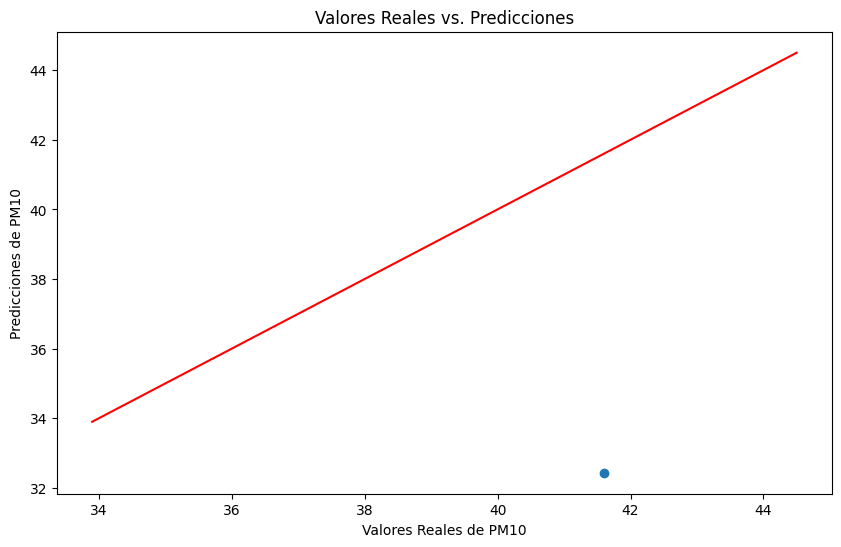

In [10]:
#Paso 7: Visualización (Opcional)
import matplotlib.pyplot as plt
import seaborn as sns

# Comparar los valores reales con las predicciones
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Valores Reales de PM10')
plt.ylabel('Predicciones de PM10')
plt.title('Valores Reales vs. Predicciones')
plt.plot([min(y), max(y)], [min(y), max(y)], color='red')  # Línea de referencia
plt.show()
